 ## 1 задание

Дан обучающий сет с численными признаками. Дополнительно известно, что целевая функция 

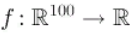

линейная и гарантированно зависит от всех признаков.

Требуется найти целевую функцию.

Решение будет зачтено, если абсолютная ошибка на каждом примере не превышает 10^-8.



##### Формат ввода:


Обучающий датасет train.tsv находится в архиве, доступном по адресу https://yadi.sk/d/tbP27_0X3W2NMr.



##### Формат данных: 
в каждой строке содержатся значения 100 признаков, 101-е число в каждой строке — значение целевой функции на этом наборе.



Тестовый датасет test.tsv находится в архиве, доступном по адресу https://yadi.sk/d/Tt69pkH93W2NRs.



##### Формат данных:

в каждой строке содержатся значения 100 признаков.

Каждый признак в датасетах, а также значение целевой функции — число с точностью 8 значащих цифр после десятичной точки.



##### Формат вывода:

Необходимо предоставить файл answer.tsv, в котором в i-той строке будет записано предсказанное значение функции (число с точностью 8 значащих цифр после десятичной точки) для i-той строки тестового датасета.

In [5]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression

In [6]:
data_train = pd.read_table('train.tsv', sep='\t', header=None)
data_test = pd.read_table('test.tsv', sep='\t', header=None)
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,5.081360e-03,2.732210e-03,3.976420e-03,0.004540,4.731020e-03,0.005066,0.002552,0.003555,0.003674,4.089900e-03,...,0.005197,1.644370e-03,0.005083,0.004174,0.003957,0.002386,0.004375,8.412300e-04,0.000653,0.284860
1,4.174910e-03,7.084480e-03,2.123510e-03,0.000003,3.681860e-03,0.004573,0.003550,0.008086,0.006227,3.793680e-03,...,0.000264,5.655750e-03,0.006144,0.000177,0.004394,0.001403,0.002766,3.999750e-03,0.008292,0.401233
2,1.175410e-03,1.298870e-03,2.000290e-03,0.004009,3.330520e-03,0.004482,0.000404,0.000320,0.000136,3.351720e-03,...,0.003521,3.148270e-03,0.002726,0.003363,0.003507,0.001631,0.003283,2.215900e-04,0.004203,0.239423
3,5.845890e-03,5.368910e-03,6.507510e-03,0.006121,8.502420e-03,0.008948,0.002689,0.001819,0.000579,1.125160e-03,...,0.006734,5.367000e-05,0.008358,0.003522,0.001091,0.007370,0.002647,6.058580e-03,0.000045,0.491486
4,5.600000e-07,3.700000e-07,6.200000e-07,0.000002,9.700000e-07,0.000002,0.000002,0.000002,0.000002,6.800000e-07,...,0.000002,9.800000e-07,0.000002,0.000002,0.000001,0.000001,0.000001,8.000000e-07,0.000001,0.000112


In [7]:
reg = LinearRegression()
y_train = data_train.iloc[:, 100]
X_train = data_train.iloc[:, :100]

In [8]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
X_test = data_test

In [10]:
y_test = reg.predict(X_test)

In [11]:
data_test['100'] = y_test

In [12]:
y_test = pd.DataFrame(y_test)

In [13]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.001625,0.001477,0.002368,0.004169,0.002668,0.002014,0.001802,0.001962,0.003036,0.004454,...,0.001178,0.003841,0.003548,0.003765,0.000512,0.003115,0.003500,0.001567,0.002569,0.258228
1,0.004432,0.003121,0.003630,0.003058,0.000837,0.001640,0.001846,0.001204,0.004186,0.003113,...,0.001105,0.000442,0.004347,0.000377,0.003635,0.001581,0.002216,0.004222,0.001188,0.241187
2,0.005194,0.004270,0.002174,0.000443,0.005398,0.001527,0.000288,0.004906,0.005213,0.005860,...,0.000901,0.004286,0.006097,0.003391,0.002021,0.002080,0.001132,0.003466,0.005311,0.296651
3,0.014504,0.017867,0.002476,0.004764,0.008116,0.016214,0.011130,0.009624,0.011102,0.006736,...,0.014053,0.004479,0.003603,0.013635,0.017088,0.004584,0.010353,0.015531,0.012272,0.954577
4,0.000413,0.000121,0.000385,0.000338,0.000413,0.000190,0.000306,0.000034,0.000008,0.000124,...,0.000333,0.000290,0.000031,0.000134,0.000194,0.000144,0.000374,0.000237,0.000408,0.023343


In [22]:
file = y_test.to_csv('answerrr.tsv',  sep='\t', index=None, header=None) # этот файл и есть ответ, он оказался правильным!

In [15]:
data = pd.read_table('answerrr.tsv', sep='\t')
data.head()

,0.25822781999999994
0,0.241187
1,0.296651
2,0.954577
3,0.023343
4,0.367515


# 2 задание

Классический ROC-AUC равен

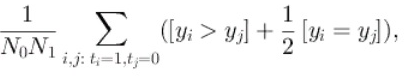


где ti, tj — правильные ответы (бинарные) для объектов i и j, N0, N1 — количества 0 и 1 среди правильных ответов соответственно, а yi, yj — предсказания модели для объектов i и j. Рассмотрим обобщённый AUC, который определён не только для бинарных ответов:


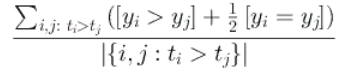

Даны массив правильных ответов и массив предсказаний модели.
Необходимо посчитать обобщённый AUC.

##### Формат ввода 

В первой строке указано одно число N — число объектов в выборке (). В каждой из следующих N строк указаны два вещественных числа (с точностью не более 6 цифр после десятичной точки): правильный ответ примера ti и предсказание модели yi для этого примера.

Гарантируется, что существуют два таких номера i и j, что ti ≠ tj.

##### Формат вывода

Выведите одно число (значение обобщённого AUC) с точностью как минимум 6 значащих цифр после десятичной точки.

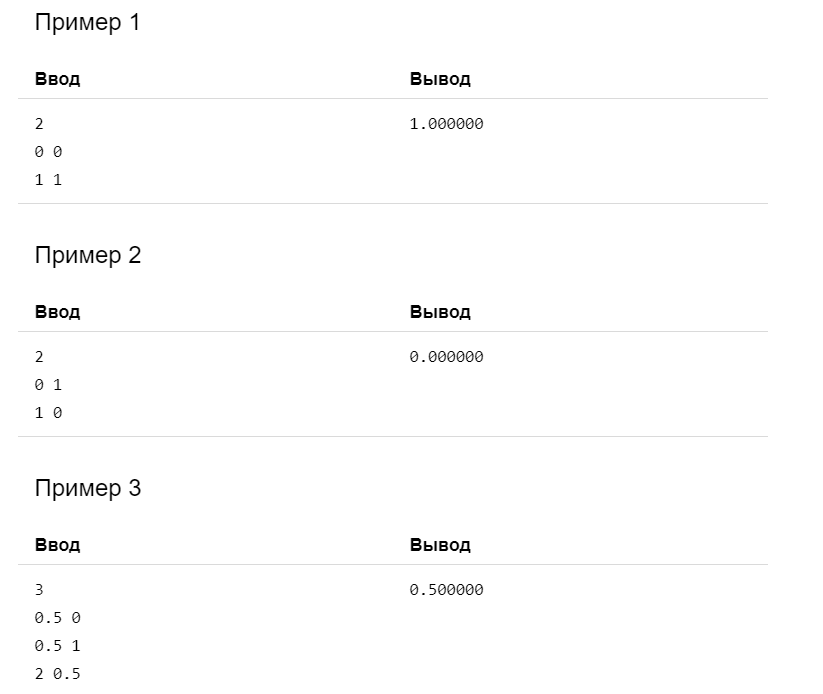

In [20]:
N = int(input())
auc = 0
for i in range(N) :
    x = [float(x) for x in input().split()]
    if x[0] == x[1] :
        auc += 1
    elif abs(x[0] - x[1]) == 1 :
        auc += 0
    else :
        auc = abs(x[0] - x[1])
print(auc/N) # работает только на первых трёх тестах :С

3
0.5 0
0.5 1
2 0.5
0.5


## 3 задание

Пользователи задают в Яндекс.Поиске десятки тысяч запросов в секунду. Часть запросов задают сотни раз в час, другая часть запросов повторяется несколько раз в день, третью часть запросов пользователи спрашивают у Яндекса впервые.
Необходимо оценить количество уникальных запросов, при условии наличия 500 KB оперативной памяти. Гарантируется, что правильный ответ не превосходит 
100000
 и не меньше, чем 50000.

Решение засчитывается, если ответ отличается от правильного не более, чем на 5%.


##### Формат ввода

В первой строке указано число n≤500000
 — количество запросов, среди которых нужно найти число уникальных. В каждой из n
 последующих строк содержится по одному запросу. Длина каждого запроса не превосходит 1000 символов.
 
##### Формат вывода

Необходимо вывести одно число — оценку количества уникальных запросов. Оценка не обязана быть целой.


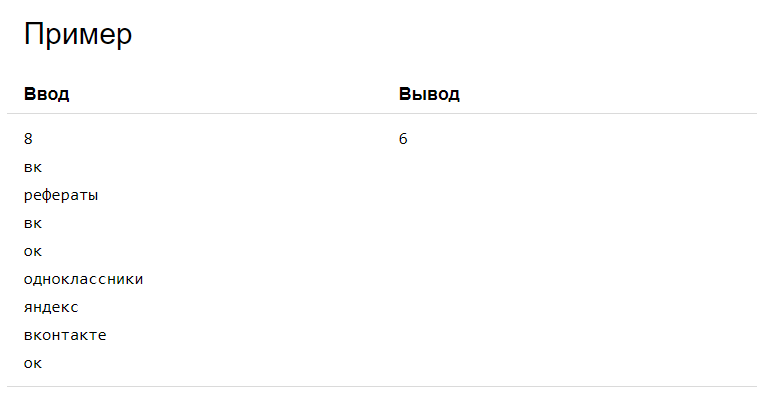

In [19]:
n = input()
zap = []
с = 0
for i in range(int(n)) :
    x = input()
    if x not in zap :
        zap.append(x)
        с += 1
print(с) # тут 5.01 МБ памяти, а нужно 5 ровно или меньше!

5
вк
сайт вшэ
курсы по машинному обучению
вк
работа дворником в москве
4


## 4 задание 

Пусть имеются n объектов: 


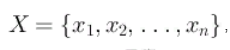

каждый из которых представлен вектором вещественных признаков: 

таких, что yi = +1, если xi относится к первому классу, и yi = -1, если xi относится ко второму классу. Известно, что выборка является линейно разделимой, то есть, существует вектор 

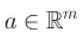

 такой, что:

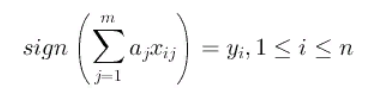

Требуется по предоставленной выборке построить любой разделяющий вектор, то есть, вектор, удовлетворяющий указанной выше системе уравнений.

##### Формат ввода

Входной файл в первой строчке содержит два числа: n и m, 1 ≤ n ≤ 104, 1 ≤ m ≤ 10. Каждая из следующих n строчек содержит ровно (m+1) число; первые m чисел каждой строчки представляют значения признаков некоторого объекта, а последнее число строчки — соответствующий этому объекту класс. Разделителем внутри каждой строки является пробел.

##### Формат вывода

Выходной файл должен содержать ровно m вещественных чисел, разделённых пробелом — компоненты разделяющей гиперплоскости.

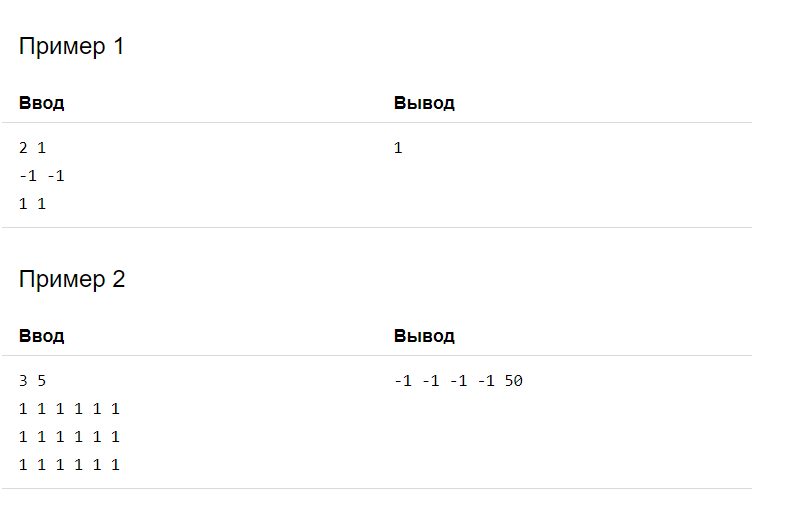

In [21]:
# решения нет :))

## 5 задание

Есть два метода генерации случайных перестановок длины 8 — правильный и творческий. Код этих методов приведён ниже


#### Реализация на Python:

def RandomPermutation():  
/ / / /perm = list(range(8))  
/ / / /random.shuffle(perm)  
/ / / /return perm  
 
def StupidPermutation():  
/ / / /partialSums = [0,1,8,35,111,285,  
/ / / / 628,1230,2191,3606,5546,8039,11056,14506,18242,  
/ / / /22078,25814,29264,32281,34774,36714,38129,39090,  
/ / / /39692,40035,40209,40285,40312,40319,40320]  
/ / / /r = random.randint(0, partialSums[-1])  
/ / / /numInv = 0  
/ / / /while partialSums[numInv] < r:  
/ / / / / / / /numInv += 1  
/ / / /perm = list(range(8))  
/ / / /for step in range(numInv):  
/ / / / / / / /t1 = random.randint(0, 7)  
/ / / / / / / /t2 = random.randint(0, 7)  
/ / / / / / / /perm[t1], perm[t2] = perm[t2], perm[t1]  
/ / / /return perm


В правильном методе генерируется случайная перестановка. В творческом сначала выбирается число 
n
u
m
I
n
v
, соответствующее доле неправильно упорядоченных пар чисел в случайной перестановке. Массив 
p
a
r
t
i
a
l
S
u
m
s
 выбран таким образом, что распределение величины 
n
u
m
I
n
v
 получается правильным. Дальше допущена ошибка, в результате которой не все перестановки будут получаться с одинаковыми вероятностями. Получив достаточно большое количество перестановок, сгенерированных одним из методов, можно угадать, что это был за метод.
В этой задаче по набору из 
1
0
0
0
 перестановок необходимо определить, каким методом он был получен. Дано 
n
 таких наборов, нужно отсортировать их так, чтобы сначала шли хорошие наборы, а потом творческие.
Решение засчитывается, если среди всех пар наборов (хороший, творческий), хотя бы 98% идёт в правильном порядке.

#### Формат ввода
Файл permutations.in находится в архиве, доступном по адресу https://yadi.sk/d/yA0QoJc83W3ykq.
В первой его строке указано одно число 
n
 — количество наборов перестановок. В каждой из следующих 
1
0
0
0
n
 строк указано по перестанове чисел от 
0
 до 
7
. Первая 
1
0
0
0
 строк соответствет первому набору перестановок, вторая 
1
0
0
0
 второму и т.д.

#### Формат вывода
Выведите 
n
 чисел — в 
i
-ой строке должен быть указан номер набора перестановок (от 
0
 до 
n
−
1
). Сначала должны идти номера хороших наборов, потом творческих.


In [ ]:
# решения нет :)

## 6 задание

Регулярно пользователи Яндекс.Карт выбирают подходящий для них ресторан по множеству критериев. Для упрощения будут рассмотрены два фактора, влияющие на их выбор: расстояние до пользователя и рейтинг организации. Имеется несколько тысяч попарных оценок от реальных пользователей, в каждой из которых одна пара (расстояние, рейтинг) сравнивается с другой. Необходимо построить модель, монотонно зависящую от двух этих факторов, которая согласуется с наибольшей долей оценок.

#### Формат ввода
Обучающий датасет restaurants_train.txt находится в архиве, доступном по адресу https://yadi.sk/d/PU6iAbNY3W2Vao.

Каждая его строка содержит 5 чисел, разделённых табуляцией: winner, r1, r2, d1, d2. При этом winner равен 0, если победил первый ресторан, 1, если второй и 0.5, если случилась ничья. Пары ri, di соответствуют рейтингам и расстояниям для первого и второго ресторанов. Рейтинги ri равны либо -1, что означает, что рейтинг отсутствует, либо принимают действительные значения от 0 до 10.

Расстояния di равны 1, если настоящее расстояние не меньше 500 километров и отношению 

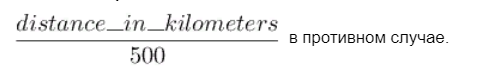

Во время тестирования на вход вашей программе будет дан файл restaurants.in, в котором в первой строке указано число n ≤ 20000 — количество ресторанов, для которых вам нужно указать, насколько они хороши. В следующих n строках задано по два числа, разделённых табом — в i-ой строке ri и di.

#### Формат вывода
Необходимо вывести n строк, в каждой из которых содержится по одному действительному числу — в i-ой строке число scorei, означающее насколько хорош соответствующий ресторан.

Решение считается корректным, если не существует двух ресторанов (ri, dj), (rj, dj), таких, что рейтинги ri и rj определены, ri ≥ rj, di ≤ dj и при этом первый ресторан оценён хуже, чем второй (scorei < scorej). Если решение некорректно, то оно получает 0 баллов.

Для корректного решения будет подсчитана его согласованность с N парами вида (winnerk, looserk), про которые известно, что пользователь оценил ресторан winnerk выше, чем looserk. Чем больше разница между победителем и проигравшим, тем выше итоговый балл. А именно, будет подсчитано



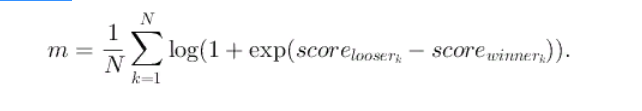

На закрытом наборе данных вычисляется значение m, далее баллы за задачу начисляются следующим образом (всюду шкала линейная, чем выше значение m, тем меньше начисляется баллов):

* 0 баллов, если m ≥ 0.69
* 0 до 1 балла, если 0.68 ≤ m ≤ 0.69
* от 1 до 2 баллов, если 0.648 ≤ m ≤ 0.68
* от 2 до 3 баллов, если 0.627 ≤ m ≤ 0.648
* от 3 до 4 баллов, если 0.6 ≤ m ≤ 0.627
* 4 балла, если m ≤ 0.6

Примечания
Во время турнира баллы будут подсчитаны по небольшому подмножеству набора пар (winnerk, looserk), по завершении раунда результаты будут пересчитаны с помощью оставшихся пар.



In [25]:
# решения нет :)